Beginning of data analysis project for magnetar brewing  
Focused on user review analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\ethan\AppData\Local\Temp\ipykernel_18848\3636539039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("beer_reviews.csv")

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


## Clean-up

In [5]:
for col in df.columns:
    print(f"# of null values in {col}: {len(df[df[col].isnull()])}")

# of null values in brewery_id: 0
# of null values in brewery_name: 15
# of null values in review_time: 0
# of null values in review_overall: 0
# of null values in review_aroma: 0
# of null values in review_appearance: 0
# of null values in review_profilename: 348
# of null values in beer_style: 0
# of null values in review_palate: 0
# of null values in review_taste: 0
# of null values in beer_name: 0
# of null values in beer_abv: 67785
# of null values in beer_beerid: 0


Don't really care about null profile names or brewery names, but null abv values can problematic

In [6]:
df[df["brewery_name"].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [7]:
print(df[df["beer_beerid"] == 63324].to_string())

        brewery_id brewery_name  review_time  review_overall  review_aroma  review_appearance review_profilename                  beer_style  review_palate  review_taste                                            beer_name  beer_abv  beer_beerid
659303        1193          NaN   1298078926             3.0           3.0                3.0         Ochsenblut  Keller Bier / Zwickel Bier            2.0           3.0  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324
659304        1193          NaN   1292423271             4.5           4.0                4.0         Dentist666  Keller Bier / Zwickel Bier            4.0           4.5  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324
659305        1193          NaN   1289329962             3.5           3.5                4.0             dqrull  Keller Bier / Zwickel Bier            4.0           4.0  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324


In [8]:
df[df["brewery_name"] == "Crailsheimer"]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


Given large size of dataset, safe to drop null values

In [9]:
df_trim = df.dropna()
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


In [10]:
len(df_trim) / len(df)

0.9570557173956614

Now to check for duplicated reviews

In [11]:
columns = df_trim.columns
columns = columns.delete(2) # drop review_time from criteria for duplicate rows
df_trim[df_trim.duplicated(columns, keep=False)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1637,1454,Broad Ripple Brew Pub,1189969120,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
1639,1454,Broad Ripple Brew Pub,1160959471,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
10063,5049,Bath Ales Ltd,1220295894,4.0,3.5,4.0,wl0307,English Bitter,4.0,4.0,Barnstormer,4.50,13084
10064,5049,Bath Ales Ltd,1209506236,4.0,3.5,4.0,wl0307,English Bitter,4.0,4.0,Barnstormer,4.50,13084
10570,365,Pike Pub & Brewery,1282765789,5.0,4.5,4.0,Offa,American Pale Ale (APA),4.5,4.5,Pike Pale Ale,5.30,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584107,41,Brouwerij Corsendonk,1026396463,4.0,4.5,4.0,goindownsouth,Dubbel,4.0,4.0,Corsendonk Pater / Abbey Brown Ale,7.50,138
1585814,3835,Drake's Brewing Co.,1155698759,4.5,4.0,4.0,rayjay,Russian Imperial Stout,4.5,4.0,Drake's Drakonic Imperial Stout,8.75,12172
1585815,3835,Drake's Brewing Co.,1153800298,4.5,4.0,4.0,rayjay,Russian Imperial Stout,4.5,4.0,Drake's Drakonic Imperial Stout,8.75,12172
1586580,14359,The Defiant Brewing Company,1206208673,5.0,4.5,4.5,EPseja,Irish Dry Stout,4.5,4.5,O'Defiant Stout,5.50,36388


Change to keep="first" and then drop duplicates!

In [12]:
df_trim = df_trim.drop_duplicates(columns, keep="first")
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517728 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1517728 non-null  int64  
 1   brewery_name        1517728 non-null  object 
 2   review_time         1517728 non-null  int64  
 3   review_overall      1517728 non-null  float64
 4   review_aroma        1517728 non-null  float64
 5   review_appearance   1517728 non-null  float64
 6   review_profilename  1517728 non-null  object 
 7   beer_style          1517728 non-null  object 
 8   review_palate       1517728 non-null  float64
 9   review_taste        1517728 non-null  float64
 10  beer_name           1517728 non-null  object 
 11  beer_abv            1517728 non-null  float64
 12  beer_beerid         1517728 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.1+ MB


Only keep one user review for each beer. Keep latest review (people can change their minds)

In [13]:
df_final = df_trim.sort_values(by=['review_time']).drop_duplicates(["beer_beerid", "review_profilename"], keep="last")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504037 entries, 286273 to 551371
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1504037 non-null  int64  
 1   brewery_name        1504037 non-null  object 
 2   review_time         1504037 non-null  int64  
 3   review_overall      1504037 non-null  float64
 4   review_aroma        1504037 non-null  float64
 5   review_appearance   1504037 non-null  float64
 6   review_profilename  1504037 non-null  object 
 7   beer_style          1504037 non-null  object 
 8   review_palate       1504037 non-null  float64
 9   review_taste        1504037 non-null  float64
 10  beer_name           1504037 non-null  object 
 11  beer_abv            1504037 non-null  float64
 12  beer_beerid         1504037 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 160.6+ MB


In [14]:
df_final.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
286273,35,Boston Beer Company (Samuel Adams),884390401,4.0,4.0,3.0,Todd,American Strong Ale,4.5,4.5,Samuel Adams Triple Bock,17.5,111
764128,144,Sprecher Brewing Company,884649601,4.5,4.0,4.0,BeerAdvocate,Vienna Lager,4.0,4.0,Special Amber,5.0,97
1417077,139,Shipyard Brewing Co.,885340801,4.0,3.5,3.0,BeerAdvocate,English Pale Ale,3.5,4.0,Tremont Ale,4.8,51
78405,140,Sierra Nevada Brewing Co.,886723201,4.5,4.0,4.0,BeerAdvocate,American Barleywine,4.0,4.5,Sierra Nevada Bigfoot Barleywine Style Ale,9.6,2671
1526516,45,Brooklyn Brewery,887155201,4.0,2.5,3.0,Todd,American Amber / Red Lager,3.5,3.5,Brooklyn Lager,5.2,148


## Data Distribution

In [15]:
df_final.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06
mean,3.076464e+03,1.225622e+09,3.822327e+00,3.745169e+00,3.849578e+00,3.752468e+00,3.802485e+00,7.043460e+00,2.145173e+04
std,5.545422e+03,7.572728e+07,7.173626e-01,6.950982e-01,6.141191e-01,6.792041e-01,7.285974e-01,2.323306e+00,2.179520e+04
min,1.000000e+00,8.843904e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175960e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.657000e+03
50%,4.170000e+02,1.240629e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.300900e+04
75%,2.299000e+03,1.289275e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.928600e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04


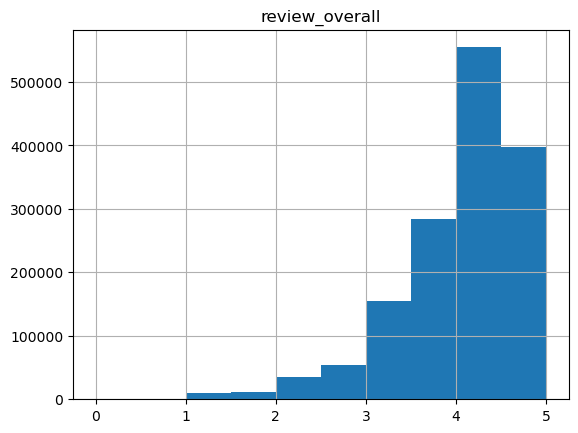

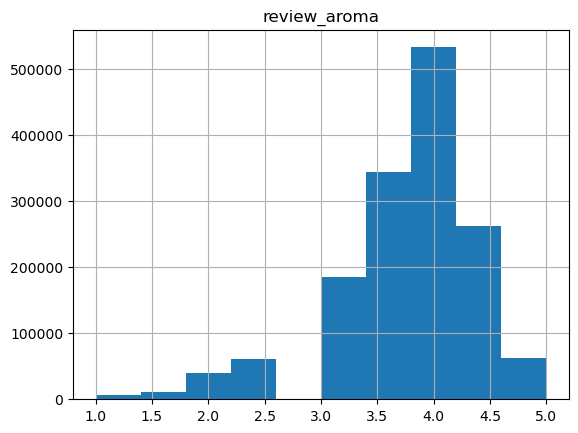

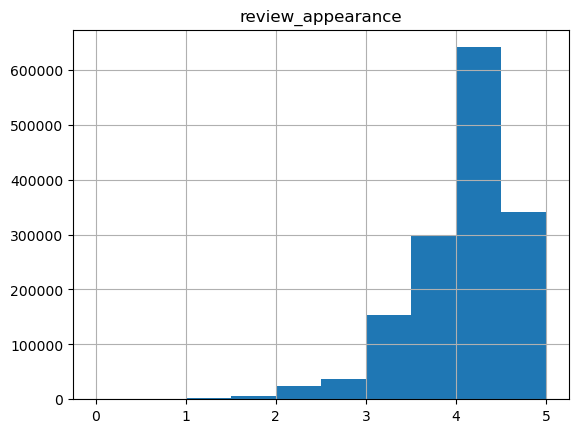

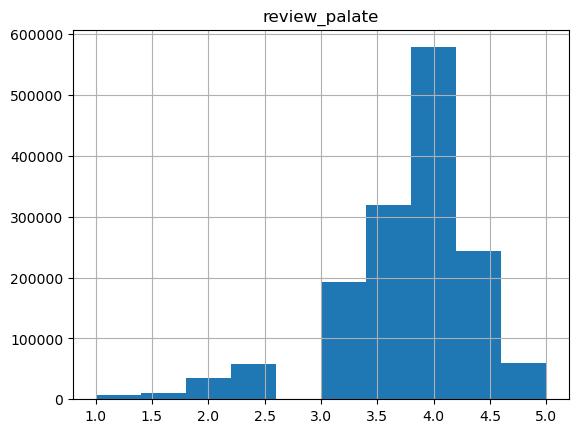

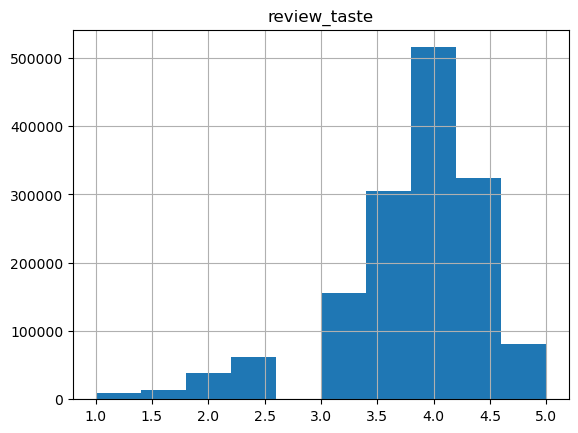

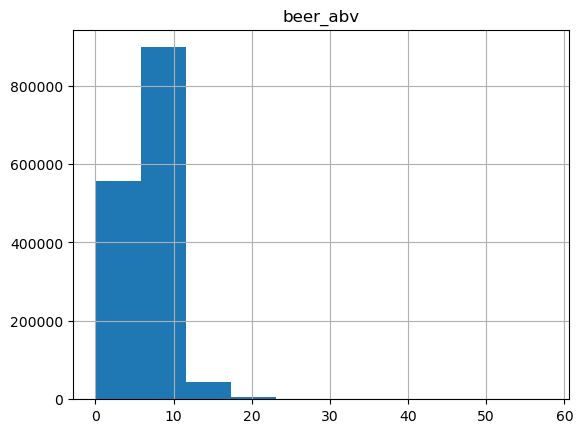

In [16]:
value_cols = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]
for col in value_cols:
    df_final.hist(col)

beer_abv obviously has a large upper outlier. Also, reviewing BeerAdvocate reveals that review scores range from 1 - 5, so all 0 scores are outliers

In [17]:
print(7.043460 + (3 * 2.323306))
print(7.043460 + (5 * 2.323306))

14.013378
18.65999


In [18]:
# using 3 std. for determining outliers for beer_abv
df_final[df_final["beer_abv"] > 7.043460 + (5 * 2.323306)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
284158,35,Boston Beer Company (Samuel Adams),1002499201,5.0,4.5,3.0,Todd,American Strong Ale,5.0,5.0,Samuel Adams Millennium,21.0,1640
284157,35,Boston Beer Company (Samuel Adams),1002561805,5.0,5.0,5.0,gwfrankpsu,American Strong Ale,5.0,5.0,Samuel Adams Millennium,21.0,1640
297558,35,Boston Beer Company (Samuel Adams),1018096849,5.0,5.0,5.0,Jdiddy,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
297557,35,Boston Beer Company (Samuel Adams),1020435007,4.5,4.5,4.5,Andy,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
297556,35,Boston Beer Company (Samuel Adams),1024310446,4.5,5.0,5.0,jackndan,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993808,15237,De Struise Brouwers,1326082073,4.5,4.5,4.5,drabmuh,American Double / Imperial Stout,4.5,4.0,Black Damnation V - Double Black,26.0,56776
996003,15237,De Struise Brouwers,1326106103,4.5,5.0,5.0,PapaEugene,Russian Imperial Stout,5.0,4.5,Black Damnation XI - Special Kay,22.0,44605
1375144,4738,Grand Lake Brewing Company,1326109900,3.0,3.5,3.0,spdyfire83,American Strong Ale,3.5,3.0,Holy Grail,20.0,40351
993807,15237,De Struise Brouwers,1326125617,5.0,4.5,5.0,spdyfire83,American Double / Imperial Stout,4.5,5.0,Black Damnation V - Double Black,26.0,56776


After some research, the ridiculously large abv outliers are actual real beers.  
Still need to cut out outliers for accurate modelling with abv.  
Potential cutoffs:  
3 std. dev. - 14.01  
5 std. dev. - 18.66  
Sam Adams Utopias 2017 - 28

In [19]:
df_final = df_final.query("review_overall > 0 and review_appearance > 0 and beer_abv < 18.66")
# discussion with John -> 14 abv is high but not ludicrous, set cutoff to 18.66

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503214 entries, 286273 to 551371
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1503214 non-null  int64  
 1   brewery_name        1503214 non-null  object 
 2   review_time         1503214 non-null  int64  
 3   review_overall      1503214 non-null  float64
 4   review_aroma        1503214 non-null  float64
 5   review_appearance   1503214 non-null  float64
 6   review_profilename  1503214 non-null  object 
 7   beer_style          1503214 non-null  object 
 8   review_palate       1503214 non-null  float64
 9   review_taste        1503214 non-null  float64
 10  beer_name           1503214 non-null  object 
 11  beer_abv            1503214 non-null  float64
 12  beer_beerid         1503214 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 160.6+ MB


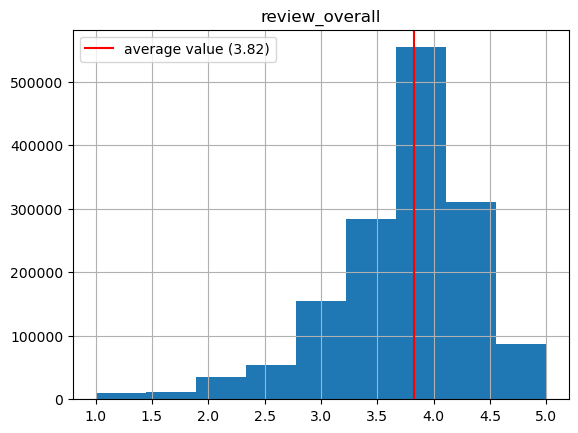

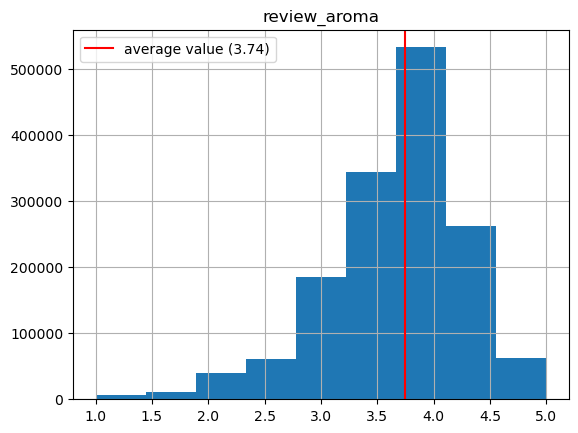

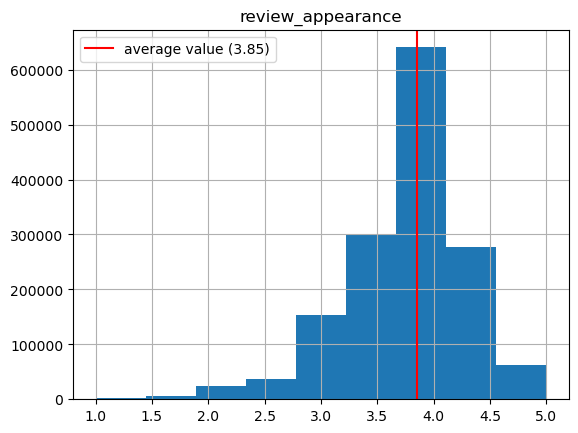

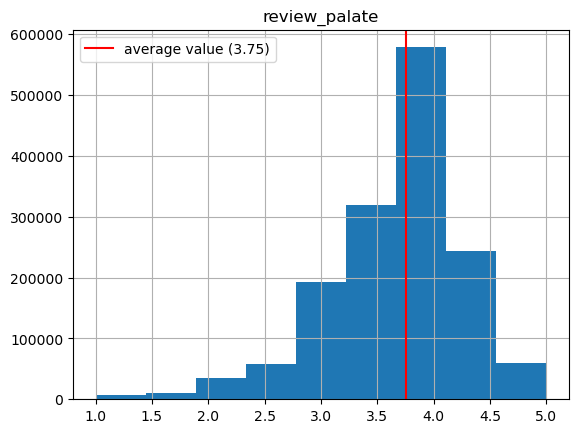

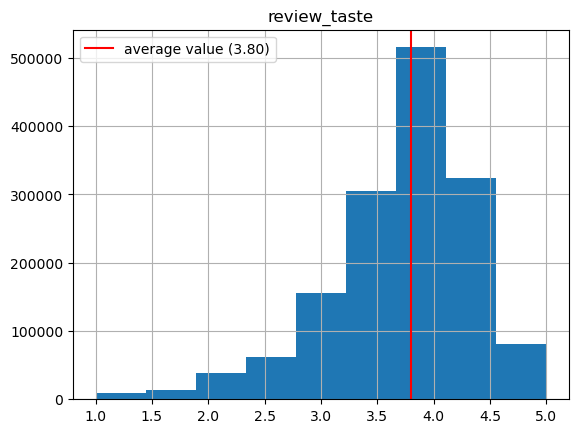

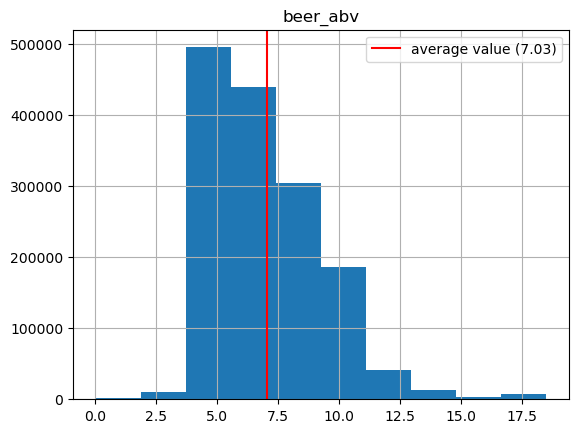

In [21]:
for col in value_cols:
    if col != "beer_abv":
        ax = df_final.hist(col, bins=9)
        loc = "upper left"
    else:
        ax = df_final.hist(col)
        loc = "upper right"
    temp = df_final[col].mean()
    two_dec = "%.2f" % temp
    ax[0][0].axvline(x = temp, label=f"average value ({two_dec})", c="red")
    ax[0][0].legend(loc=loc)
    ax[0][0].get_figure().savefig(f"figures/{col}.png")

In [22]:
df_final.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06,1.503214e+06
mean,3.074698e+03,1.225605e+09,3.822335e+00,3.744934e+00,3.849485e+00,3.752333e+00,3.802300e+00,7.032227e+00,2.144307e+04
std,5.543630e+03,7.572715e+07,7.171502e-01,6.949614e-01,6.140229e-01,6.790528e-01,7.284471e-01,2.269396e+00,2.179404e+04
min,1.000000e+00,8.843904e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175916e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.655000e+03
50%,4.170000e+02,1.240617e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.297300e+04
75%,2.299000e+03,1.289268e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.927300e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.850000e+01,7.731600e+04


Why is there a gap in the ratings between 2.5 and 3?

In [23]:
# df_final["review_overall"].plot(kind="kde")   takes a minute, skip this in the future
print(df_final)

         brewery_id                        brewery_name  review_time  \
286273           35  Boston Beer Company (Samuel Adams)    884390401   
764128          144            Sprecher Brewing Company    884649601   
1417077         139                Shipyard Brewing Co.    885340801   
78405           140           Sierra Nevada Brewing Co.    886723201   
1526516          45                    Brooklyn Brewery    887155201   
...             ...                                 ...          ...   
562035          423               Boulevard Brewing Co.   1326274454   
1153730         454             Arcadia Brewing Company   1326275049   
400524          694              Tröegs Brewing Company   1326276656   
551392        22194                   Flat Tail Brewing   1326284970   
551371        22194                   Flat Tail Brewing   1326285348   

         review_overall  review_aroma  review_appearance review_profilename  \
286273              4.0           4.0                3.0

Just an issue with the histogram, entries at every integer [1, 5] and inbetween each int at x.5

## Review Correlations

In [24]:
# Pearson (linear) and Spearman (monotonic) correlations of review ratings and beer_abv
pear_corr = df_final[value_cols].corr("pearson")
pear_corr

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.612830,0.498128,0.698941,0.787439,0.141918
review_aroma,0.612830,1.000000,0.558383,0.614229,0.714293,0.337108
review_appearance,0.498128,0.558383,1.000000,0.563846,0.543838,0.268340
review_palate,0.698941,0.614229,0.563846,1.000000,0.731752,0.291573
review_taste,0.787439,0.714293,0.543838,0.731752,1.000000,0.295265
beer_abv,0.141918,0.337108,0.268340,0.291573,0.295265,1.000000


In [25]:
spear_corr = df_final[value_cols].corr("spearman")
spear_corr

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.554528,0.450998,0.650117,0.727042,0.173933
review_aroma,0.554528,1.000000,0.493709,0.560791,0.666685,0.381490
review_appearance,0.450998,0.493709,1.000000,0.510397,0.489442,0.306438
review_palate,0.650117,0.560791,0.510397,1.000000,0.684407,0.331567
review_taste,0.727042,0.666685,0.489442,0.684407,1.000000,0.345923
beer_abv,0.173933,0.381490,0.306438,0.331567,0.345923,1.000000


In [26]:
def heatmap_from_df(df: pd.DataFrame, title: str, save_path: str):
    ax = sb.heatmap(df, cmap="coolwarm", annot=True, fmt='.2f', vmin=0, vmax=1)
    ax.xaxis.tick_top()
    ax.tick_params(axis='x', rotation=60, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.set_title(title)
    plt.tight_layout()
    ax.get_figure().savefig(save_path, dpi=400)
    plt.show()
    plt.close()

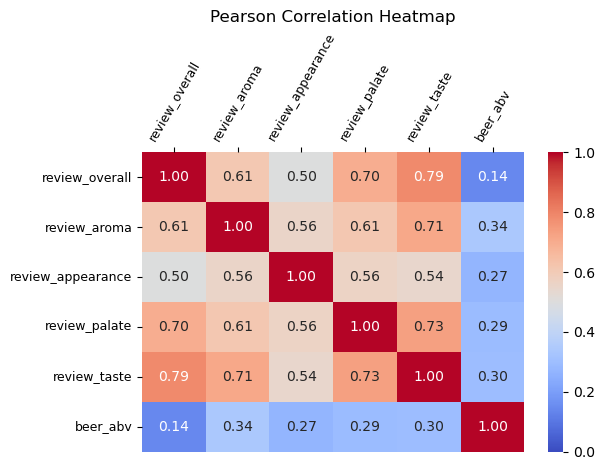

In [27]:
heatmap_from_df(pear_corr, "Pearson Correlation Heatmap", "figures/pearson-heatmap.png")

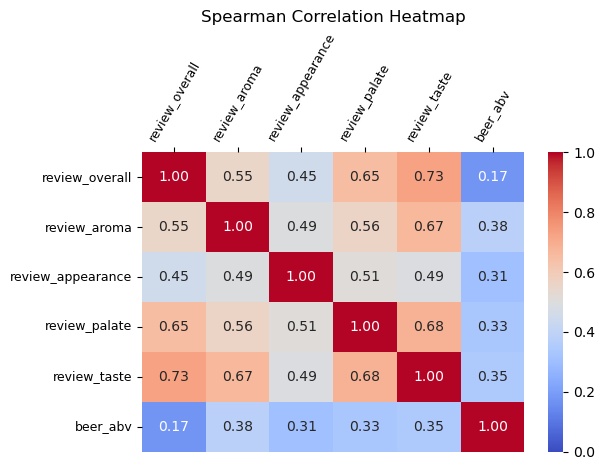

In [28]:
heatmap_from_df(spear_corr, "Spearman Correlation Heatmap", "figures/spearman-heatmap.png")

Next steps:  
One-hot encoding for beer types  
2D plot of overall review per beer by beer type and by user and by brewery (cluster analysis)  
Text analysis of beer names and brewery names for review? (deep learning)  
PCA dimensionality reduction

## Best/Most Popular Beers/Breweries/Beer Styles

For quality's sake, only items with >100 reviews will be considered

FIX THE COUNT FILTERING!!!

In [114]:
def threshold_count(df: pd.DataFrame, col: str, thresh: int = 100):
    # threshold is not included
    count = df[col].value_counts()
    count = count.loc[lambda x : x >= thresh]
    new_df = df[df[col].isin(count.index)]
    return new_df, count


In [100]:
def add_col(df: pd.DataFrame, s: pd.Series) -> pd.DataFrame:
    # gotta have the same index
    return pd.merge(df, s, left_index=True, right_index=True)

Highest avg. scores first

In [101]:
temp = df_final[df_final["beer_name"] == "90 Minute IPA"]
temp

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1175530,10099,Dogfish Head Brewery,1009300168,4.0,4.0,4.0,marc77,American Double / Imperial IPA,5.0,4.0,90 Minute IPA,9.0,2093
1175367,10099,Dogfish Head Brewery,1013122135,4.5,4.5,5.0,mophie,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093
1175356,10099,Dogfish Head Brewery,1013158696,4.0,4.0,4.0,John,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093
1175529,10099,Dogfish Head Brewery,1013644792,4.0,5.0,4.5,Murph,American Double / Imperial IPA,4.5,3.5,90 Minute IPA,9.0,2093
1175528,10099,Dogfish Head Brewery,1014253586,1.5,3.5,4.0,cokes,American Double / Imperial IPA,2.5,2.5,90 Minute IPA,9.0,2093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174088,10099,Dogfish Head Brewery,1326159749,4.5,4.5,3.0,Rob315,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093
1174087,10099,Dogfish Head Brewery,1326204713,4.5,4.5,3.5,tsauce2,American Double / Imperial IPA,4.0,4.0,90 Minute IPA,9.0,2093
1174085,10099,Dogfish Head Brewery,1326248464,4.5,4.5,5.0,rangerred,American Double / Imperial IPA,5.0,4.5,90 Minute IPA,9.0,2093
1174084,10099,Dogfish Head Brewery,1326251329,4.5,3.5,5.0,mattbk,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093


Ok so value_counts works

### Beers

In [107]:
best_beers = df_final[["beer_name"] + value_cols]
best_beers, count = threshold_count(best_beers, "beer_name")
best_beers = best_beers.groupby(["beer_name"]).mean() # HAVE TO DO THRESHOLD BEFORE GROUPBY  DUH!
best_beers = add_col(best_beers, count)
best_beers = best_beers.round(3)
best_beers.sort_values("review_overall", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
beer_name,,,,,,,
Cantillon Blåbær Lambik,4.626,4.529,4.645,4.497,4.629,5.00,155
Citra DIPA,4.626,4.689,4.370,4.366,4.575,8.00,246
Deviation - Bottleworks 9th Anniversary,4.621,4.598,4.371,4.567,4.688,6.83,112
Trappist Westvleteren 12,4.618,4.583,4.454,4.633,4.719,10.20,1272
Heady Topper,4.617,4.655,4.155,4.397,4.605,8.00,443
Pliny The Younger,4.599,4.722,4.481,4.610,4.721,11.00,592
Pliny The Elder,4.593,4.615,4.391,4.453,4.633,8.00,2432
Founders CBS Imperial Stout,4.591,4.562,4.463,4.578,4.696,10.60,618
Live Oak HefeWeizen,4.563,4.308,4.212,4.253,4.395,5.20,318


In [108]:
best_beers.loc["90 Minute IPA"]

review_overall          4.147
review_aroma            4.214
review_appearance       4.192
review_palate           4.180
review_taste            4.328
beer_abv                9.000
count                3206.000
Name: 90 Minute IPA, dtype: float64

At long last, the best 25 beers by rating

Upside is that sorting by popularity is easy now  
25 most popular beers by review count

In [109]:
best_beers.sort_values("count", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
beer_name,,,,,,,
90 Minute IPA,4.147,4.214,4.192,4.180,4.328,9.000,3206
Old Rasputin Russian Imperial Stout,4.174,4.199,4.372,4.229,4.342,9.000,3038
Sierra Nevada Celebration Ale,4.168,4.081,4.225,4.075,4.188,6.800,2929
India Pale Ale,3.852,3.774,3.866,3.769,3.810,6.462,2926
Stone Ruination IPA,4.163,4.343,4.181,4.183,4.351,7.700,2644
Arrogant Bastard Ale,4.080,4.119,4.295,4.144,4.280,7.200,2633
Two Hearted Ale,4.327,4.263,4.151,4.137,4.316,7.000,2631
Sierra Nevada Pale Ale,4.248,3.915,3.995,3.971,4.117,5.600,2526
Stone IPA (India Pale Ale),4.256,4.240,4.135,4.137,4.296,6.900,2526


### Breweries

Refactor the code below in optimized notebook

In [110]:
best_brews = df_final[["brewery_name"] + value_cols]
best_brews, count = threshold_count(best_brews, "brewery_name")
best_brews = best_brews.groupby(["brewery_name"]).mean() # HAVE TO DO THRESHOLD BEFORE GROUPBY  DUH!
best_brews = add_col(best_brews, count)
best_brews = best_brews.round(3)
best_brews.sort_values("review_overall", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
brewery_name,,,,,,,
The Alchemist,4.573,4.601,4.166,4.380,4.566,8.278,500
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),4.545,4.469,4.403,4.526,4.589,8.809,2378
Russian River Brewing Company,4.373,4.348,4.234,4.286,4.408,7.598,11043
Badische Staatsbrauerei Rothaus AG,4.357,3.968,3.956,4.040,4.159,5.240,126
Närke Kulturbryggeri AB,4.357,4.377,4.237,4.321,4.437,8.195,207
De Cam Geuzestekerij,4.321,4.302,4.057,4.148,4.390,5.365,159
Live Oak Brewing Company,4.314,4.136,4.103,4.108,4.210,5.715,571
Hill Farmstead Brewery,4.298,4.301,4.204,4.187,4.299,7.403,1495
Brouwerij Drie Fonteinen,4.293,4.309,4.188,4.200,4.334,6.127,1661


In [111]:
best_brews.sort_values("count", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
brewery_name,,,,,,,
Boston Beer Company (Samuel Adams),3.687,3.586,3.805,3.637,3.639,6.198,38106
Dogfish Head Brewery,3.835,3.916,3.943,3.894,3.970,9.508,33427
Stone Brewing Co.,4.039,4.094,4.151,4.072,4.149,8.254,32525
Sierra Nevada Brewing Co.,4.055,3.896,4.097,3.965,4.028,6.907,28237
"Bell's Brewery, Inc.",3.970,3.937,3.983,3.964,4.011,7.555,24611
Rogue Ales,3.909,3.872,3.995,3.883,3.948,6.567,23201
Founders Brewing Company,4.114,4.182,4.114,4.136,4.241,8.889,19655
Victory Brewing Company,3.993,3.914,3.974,3.950,4.013,7.699,19102
Lagunitas Brewing Company,3.955,3.930,3.947,3.883,3.963,8.166,16661


### Beer Styles

In [112]:
best_styles = df_final[["beer_style"] + value_cols]
best_styles, count = threshold_count(best_styles, "beer_style")
best_styles = best_styles.groupby(["beer_style"]).mean() # HAVE TO DO THRESHOLD BEFORE GROUPBY  DUH!
best_styles = add_col(best_styles, count)
best_styles = best_styles.round(3)
best_styles.sort_values("review_overall", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
beer_style,,,,,,,
American Wild Ale,4.099,4.133,4.010,4.045,4.159,7.713,16731
Gueuze,4.086,4.115,4.037,4.049,4.126,5.600,5900
Quadrupel (Quad),4.073,4.133,4.120,4.127,4.212,10.464,17850
Lambic - Unblended,4.062,4.126,3.918,3.970,4.133,5.300,1034
American Double / Imperial Stout,4.029,4.159,4.163,4.098,4.186,10.535,49394
Russian Imperial Stout,4.023,4.076,4.211,4.087,4.150,9.986,52850
Weizenbock,4.010,4.048,4.013,3.993,4.080,8.134,9190
American Double / Imperial IPA,3.998,4.098,4.079,4.024,4.091,9.342,83742
Flanders Red Ale,3.995,4.045,4.003,3.973,4.093,6.089,6508


In [113]:
best_styles.sort_values("count", ascending=False).head(25)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,count
beer_style,,,,,,,
American IPA,3.969,3.899,3.972,3.871,3.927,6.634,111293
American Double / Imperial IPA,3.998,4.098,4.079,4.024,4.091,9.342,83742
American Pale Ale (APA),3.869,3.673,3.794,3.698,3.738,5.470,57422
Russian Imperial Stout,4.023,4.076,4.211,4.087,4.150,9.986,52850
American Double / Imperial Stout,4.029,4.159,4.163,4.098,4.186,10.535,49394
American Porter,3.908,3.846,3.965,3.797,3.911,6.244,46300
American Amber / Red Ale,3.801,3.652,3.828,3.676,3.719,6.031,41282
Belgian Strong Dark Ale,3.914,3.972,4.010,3.938,4.029,9.430,37270
Fruit / Vegetable Beer,3.417,3.529,3.520,3.398,3.409,5.805,31832


### Look into beers by brewery??? see distribution of ratings and styles

## One Hot Encoding

In [ ]:
def encoding(df: pd.DataFrame):
    hot_encoded = pd.get_dummies(df["beer_style"], dtype=np.int64, prefix='beer_style')
    df_new = pd.concat([df.drop('beer_style', axis=1), hot_encoded], axis=1)
    return df_new

In [ ]:
df_encoded = encoding(df_final)
df_encoded

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,...,beer_style_Scotch Ale / Wee Heavy,beer_style_Scottish Ale,beer_style_Scottish Gruit / Ancient Herbed Ale,beer_style_Smoked Beer,beer_style_Tripel,beer_style_Vienna Lager,beer_style_Weizenbock,beer_style_Wheatwine,beer_style_Winter Warmer,beer_style_Witbier
286273,35,Boston Beer Company (Samuel Adams),884390401,4.0,4.0,3.0,Todd,4.5,4.5,Samuel Adams Triple Bock,...,0,0,0,0,0,0,0,0,0,0
764128,144,Sprecher Brewing Company,884649601,4.5,4.0,4.0,BeerAdvocate,4.0,4.0,Special Amber,...,0,0,0,0,0,1,0,0,0,0
1417077,139,Shipyard Brewing Co.,885340801,4.0,3.5,3.0,BeerAdvocate,3.5,4.0,Tremont Ale,...,0,0,0,0,0,0,0,0,0,0
78405,140,Sierra Nevada Brewing Co.,886723201,4.5,4.0,4.0,BeerAdvocate,4.0,4.5,Sierra Nevada Bigfoot Barleywine Style Ale,...,0,0,0,0,0,0,0,0,0,0
1526516,45,Brooklyn Brewery,887155201,4.0,2.5,3.0,Todd,3.5,3.5,Brooklyn Lager,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562035,423,Boulevard Brewing Co.,1326274454,4.5,4.0,4.0,libbey,4.5,4.5,The Sixth Glass,...,0,0,0,0,0,0,0,0,0,0
1153730,454,Arcadia Brewing Company,1326275049,4.0,4.0,4.0,cquinn17,3.5,3.5,Arcadia Loch Down Scotch Ale,...,1,0,0,0,0,0,0,0,0,0
400524,694,Tröegs Brewing Company,1326276656,4.0,4.5,4.0,Lawl3ss,4.0,4.0,Tröegs Java Head Stout,...,0,0,0,0,0,0,0,0,0,0
551392,22194,Flat Tail Brewing,1326284970,3.5,3.5,3.0,Rifugium,3.5,3.5,Tailgater,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.loc[764128]

brewery_id                                 144
brewery_name          Sprecher Brewing Company
review_time                          884649601
review_overall                             4.5
review_aroma                               4.0
review_appearance                          4.0
review_profilename                BeerAdvocate
beer_style                        Vienna Lager
review_palate                              4.0
review_taste                               4.0
beer_name                        Special Amber
beer_abv                                   5.0
beer_beerid                                 97
Name: 764128, dtype: object

In [ ]:
len(df_final["beer_style"].unique())

104

it corresponds

104 beer styles

Predicting review by style

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df_styles = df_encoded.iloc[:, 12:]
df_styles

,beer_style_Altbier,beer_style_American Adjunct Lager,beer_style_American Amber / Red Ale,beer_style_American Amber / Red Lager,beer_style_American Barleywine,beer_style_American Black Ale,beer_style_American Blonde Ale,beer_style_American Brown Ale,beer_style_American Dark Wheat Ale,beer_style_American Double / Imperial IPA,...,beer_style_Scotch Ale / Wee Heavy,beer_style_Scottish Ale,beer_style_Scottish Gruit / Ancient Herbed Ale,beer_style_Smoked Beer,beer_style_Tripel,beer_style_Vienna Lager,beer_style_Weizenbock,beer_style_Wheatwine,beer_style_Winter Warmer,beer_style_Witbier
286273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1417077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78405,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1526516,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153730,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
400524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_styles, df_encoded["review_overall"], train_size=0.8, random_state=42)
#lin_mod = LinearRegression()
#lin_mod.fit(X_train, y_train)
#lin_mod.score(X_test, y_test)

0.1080050584042499

In [ ]:
#forest_mod = RandomForestRegressor(50)
#forest_mod.fit(X_train, y_train)
#forest_mod.score(X_test, y_test)

0.10800920192593533

still sucks

Next review by reviewer, shaded by beer_style or brewery

## Cluster Analysis

Reviews by user

In [ ]:
n_reviewers = df_encoded["review_profilename"].nunique()
n_reviewers

32896

~33,000 reviewers wrote ~1.5 M reviews